[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dougc333/Colab-Notebooks/blob/main/manifold.ipynb)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

Persistent Homology is a tool from topological data analysis showing how to visualize multidimensional clusters and multidimensional holes.

**Background**
A gaussian distribution in multiple dimensions looks like a soap bubble where the PMF is distributed across the shell of the soap bubble. There is no probability in the center. A GMM with 2 components is 2 bubbles, etc.

The PH diagrams look like:











PH detects shapes in multidimensional spaces. These aren't shapes in the traditional notion of a 2d or 3d shape since we can't visualize in multdim.

Define a point cloud as any multidimensional point, can be embedding, activations, weights. The more points the more difficult the computation.

PH scatter plot: points near diagonal are noise. Points further away can be structures.

Barcodes: a graph of barcodes growing and shrinking.

H0: define a point cloud and a connectedness

# **Manifold Hypothesis**

There exists a lower dimensional manifold where learning takes place in high parameter deep learning networks.

For example a CNN in an 1M parameter space, the weights pick out the most important edges or features of an image which is much lower dimension than the full parameter space.

Experiments to visualize a smaller dimensional latent space from NN parameters:
<ul>
<li>Autoencoders</li>
<li>UMAP: universal manifold approximation and projection</li>
<li>Eigenvalues </li>
<li>Hessian Eigenvalues </li>
<li>Fisher Informatoin Rank</li>
<li>Neutral Tangent Kernel</li>
<li>many parameters are redundant</li>
<li>Lottery Ticket hypothesis: a sparase low dimensional subnet exists</li>
<li>Training first modifies lower frequency then higher frequency? what is a freq component? </li>
</ul>





<b>Hessian</b>
<ul>
<li>Hessian </li>
</ul>



<b>Fisher Information Matrix</b>
<ul>
<li>Measures sensitivity to parameter changes</li>
<li>One measure of loss landscape similar to Hessian</li>
<li>Fisher Rao Geometry defines a curved manifold in parameter space</li>
<li>FIM defines a geometric structure and a natural gradient+stability in RL and Variational Inference. NG is not the same as the gradient in SGD</li>
</ul>



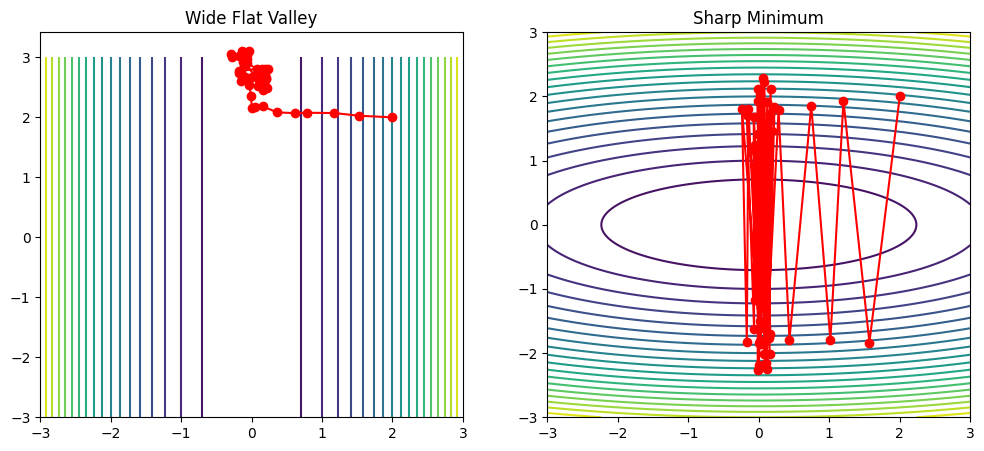

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Define two losses -----
# Flat valley loss
def L_flat(w1, w2):
    return w1**2

# Sharp bowl loss
def L_sharp(w1, w2):
    return w1**2 + 10*w2**2

# ----- gradient descent -----
def sgd(loss_grad, w, lr=0.1, steps=50, noise=0.1):
    path = [w.copy()]
    for _ in range(steps):
        g = loss_grad(w)
        w = w - lr*g + noise*np.random.randn(*w.shape)
        path.append(w.copy())
    return np.array(path)

# gradients
grad_flat = lambda w: np.array([2*w[0], 0.0])
grad_sharp = lambda w: np.array([2*w[0], 20*w[1]])

# simulate
start = np.array([2.0, 2.0])
path_flat  = sgd(grad_flat,  start.copy(), lr=0.1)
path_sharp = sgd(grad_sharp, start.copy(), lr=0.1)

# ----- Plot -----
W = np.linspace(-3,3,200)
W1, W2 = np.meshgrid(W,W)
Z_flat  = L_flat(W1,W2)
Z_sharp = L_sharp(W1,W2)

fig, axes = plt.subplots(1,2,figsize=(12,5))

axes[0].contour(W1,W2,Z_flat,levels=20)
axes[0].plot(path_flat[:,0], path_flat[:,1], '-or')
axes[0].set_title("Wide Flat Valley")

axes[1].contour(W1,W2,Z_sharp,levels=20)
axes[1].plot(path_sharp[:,0], path_sharp[:,1], '-or')
axes[1].set_title("Sharp Minimum")

plt.show()

Laplacian




In [ ]:
# laplacian eigenmaps


found requests


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


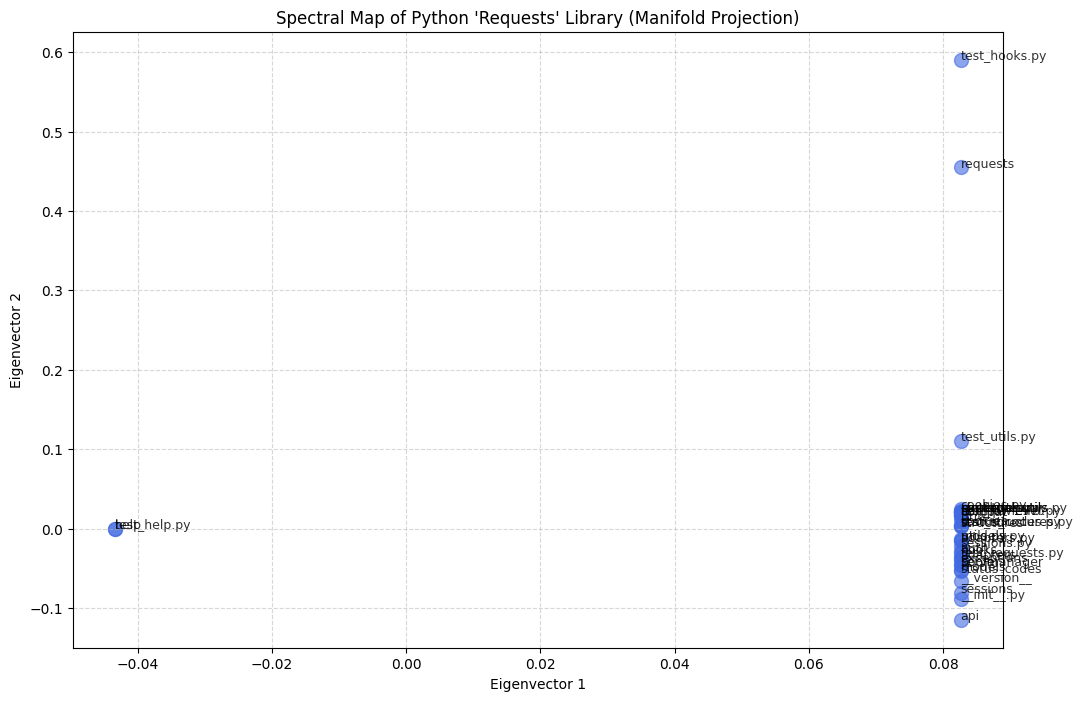

In [ ]:
import os
import ast
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding

# 1. Clone the library
if not os.path.exists('requests'):
    print('no requests')
    !git clone https://github.com/psf/requests.git
else:
  print('found requests')

# 2. Extract the Call Graph / Dependency Graph
def build_requests_graph(root_dir):
    G = nx.Graph()

    for root, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.py'):
                path = os.path.join(root, file)
                try:
                    with open(path, 'r') as f:
                        tree = ast.parse(f.read())

                    # Each file is a node
                    file_node = file
                    G.add_node(file_node)

                    # Look for imports of other internal files
                    for node in ast.walk(tree):
                        if isinstance(node, ast.ImportFrom) and node.module:
                            if 'requests' in node.module or node.level > 0:
                                # Add edge between importing file and imported module
                                G.add_edge(file_node, node.module.split('.')[-1])
                except:
                    continue
    return G

# 3. Compute Spectral Embedding
G = build_requests_graph('requests/')
# Remove isolated nodes for better visualization
G.remove_nodes_from(list(nx.isolates(G)))

adj_matrix = nx.to_numpy_array(G)
# SpectralEmbedding automatically computes the Laplacian and its Eigenvectors
embedding = SpectralEmbedding(n_components=2, affinity='precomputed')
coords = embedding.fit_transform(adj_matrix)

# 4. Visualization
plt.figure(figsize=(12, 8))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.6, c='royalblue', s=100)

# Label the nodes
for i, node in enumerate(G.nodes()):
    plt.annotate(node, (coords[i, 0], coords[i, 1]), fontsize=9, alpha=0.8)

plt.title("Spectral Map of Python 'Requests' Library (Manifold Projection)")
plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import os
import ast
import networkx as nx
import numpy as np
import plotly.graph_objects as go
from sklearn.manifold import SpectralEmbedding

# 1. Setup & Clone
if not os.path.exists('requests'):
    !git clone https://github.com/psf/requests.git

# 2. Extract Dependency Graph
def build_graph(root_dir):
    G = nx.Graph()
    for root, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.py'):
                module = file[:-3]
                G.add_node(module)
                path = os.path.join(root, file)
                try:
                    with open(path, 'r', encoding='utf-8') as f:
                        tree = ast.parse(f.read())
                    for node in ast.walk(tree):
                        if isinstance(node, ast.ImportFrom) and node.module:
                            target = node.module.split('.')[-1]
                            G.add_edge(module, target)
                except: continue
    G.remove_nodes_from(list(nx.isolates(G)))
    return G

G = build_graph('requests/')
nodes = list(G.nodes())

# 3. Compute 3D Spectral Embedding
adj = nx.to_numpy_array(G)
# n_components=3 for 3D visualization
model = SpectralEmbedding(n_components=3, affinity='precomputed', random_state=42)
coords = model.fit_transform(adj)

# 4. Define Clusters & Target Zone (Simulating Coverage Data)
# We'll color by degree centrality to show "Importance"
centrality = np.array(list(nx.degree_centrality(G).values()))
colors = centrality * 100

# Identify a "Cold Zone": Picking the node with lowest connectivity as a target
target_idx = np.argmin(centrality)
target_coord = coords[target_idx]

# 5. Create 3D Interactive Visualization
fig = go.Figure()

# Add Nodes
fig.add_trace(go.Scatter3d(
    x=coords[:, 0], y=coords[:, 1], z=coords[:, 2],
    mode='markers+text',
    marker=dict(size=8, color=colors, colorscale='Viridis', opacity=0.8, showscale=True, colorbar=dict(title="Importance")),
    text=nodes,
    hoverinfo='text',
    name='Modules'
))

# Add the "0% Coverage" Target Arrow/Marker
fig.add_trace(go.Scatter3d(
    x=[target_coord[0]], y=[target_coord[1]], z=[target_coord[2]],
    mode='markers',
    marker=dict(size=15, color='red', symbol='diamond'),
    name='Target: 0% Coverage Zone'
))

# Add Annotation Arrow
fig.add_annotation(
    text="AGENT TARGET: 0% Coverage Zone",
    showarrow=True, arrowhead=1, x=0.5, y=0.5 # Annotation in 3D requires Layout settings
)

fig.update_layout(
    title="Spectral Map of Requests Library: 3D Manifold Projection",
    template="plotly_dark",
    scene=dict(
        xaxis_title='Eigenvector 1',
        yaxis_title='Eigenvector 2',
        zaxis_title='Eigenvector 3',
        annotations=[dict(
            x=target_coord[0], y=target_coord[1], z=target_coord[2],
            text="0% Coverage Zone", showarrow=True, arrowhead=2, arrowcolor="red", ax=50, ay=-50
        )]
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


# **Continual Learning**

One of the problems in NN is forgetting earlier trained data.
<ul>
<li>Task A: digits 0-4</li>
<li>Task B: digits 5-9</li>
<li>Train MLP on task A, then on task B. After training on TB, it forgets task A. </li>
</ul>


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)


transform = transforms.ToTensor()
train_full = datasets.MNIST(root="/content/drive/MyDrive/Colab Notebooks/MNIST", train=True, download=True, transform=transform)
test_full  = datasets.MNIST(root="/content/drive/MyDrive/Colab Notebooks/MNIST", train=False, download=True, transform=transform)


Using device: cpu


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 350kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.16MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.81MB/s]


In [ ]:
import torch, torchvision
import torch.nn as nn



class MLP(nn.Modlule):
  def __init__(self,input_dim=28*28, hidden_dim=128, num_classes=10):
    super(MLP).__init__()
    self.net = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim)
        nn.ReLU()
        nn.Linear(hidden_dim, num_classes)
    )
  def forward(self, x):


Using device: cpu
X_norm shape: (8000, 3)
Epoch   1 | loss 0.90963
Epoch  10 | loss 0.14720
Epoch  20 | loss 0.08611
Epoch  30 | loss 0.06283
Epoch  40 | loss 0.05132
Epoch  50 | loss 0.04331


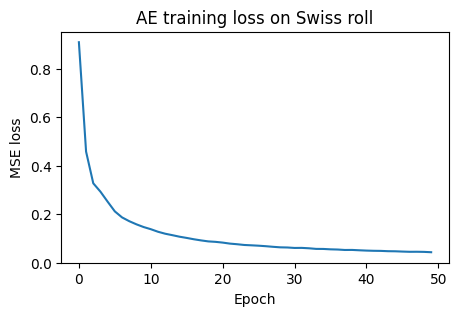

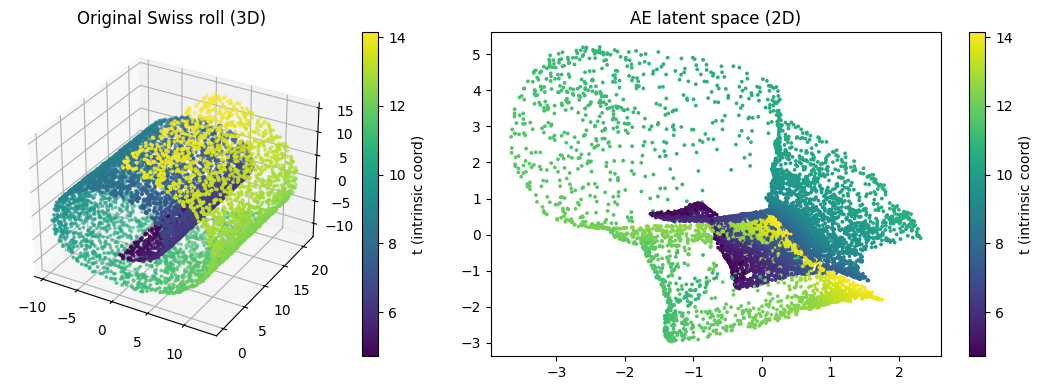

In [ ]:
# If in Colab, first:
!pip install scikit-learn matplotlib --quiet

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ---------------------------------------------------------
# 1. Generate Swiss roll data (3D points on a 2D manifold)
# ---------------------------------------------------------
n_samples = 8000
X, t = make_swiss_roll(n_samples=n_samples, noise=0.05)  # X: (N, 3), t: (N,)
X = X.astype(np.float32)
t = t.astype(np.float32)

# Optional: normalize X so it's easier for the AE
X_mean = X.mean(axis=0, keepdims=True)
X_std = X.std(axis=0, keepdims=True) + 1e-6
X_norm = (X - X_mean) / X_std

print("X_norm shape:", X_norm.shape)

# ---------------------------------------------------------
# 2. Dataset + DataLoader
# ---------------------------------------------------------
class SwissRollDataset(Dataset):
    def __init__(self, X, t):
        self.X = torch.from_numpy(X)
        self.t = torch.from_numpy(t)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.t[idx]

dataset = SwissRollDataset(X_norm, t)
train_loader = DataLoader(dataset, batch_size=256, shuffle=True)

# ---------------------------------------------------------
# 3. Autoencoder: 3D -> (hidden) -> 2D latent -> (hidden) -> 3D
# ---------------------------------------------------------
class SwissRollAE(nn.Module):
    def __init__(self, input_dim=3, latent_dim=2, hidden_dim=64):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        z = self.encode(x)
        x_hat = self.decode(z)
        return x_hat, z

model = SwissRollAE().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ---------------------------------------------------------
# 4. Train AE to reconstruct Swiss roll
# ---------------------------------------------------------
n_epochs = 50
loss_history = []

for epoch in range(1, n_epochs + 1):
    model.train()
    total_loss = 0.0
    n = 0
    for xb, tb in train_loader:
        xb = xb.to(device)
        optimizer.zero_grad()
        x_hat, z = model(xb)
        loss = criterion(x_hat, xb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)
        n += xb.size(0)

    avg_loss = total_loss / n
    loss_history.append(avg_loss)
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d} | loss {avg_loss:.5f}")

# Plot training loss
plt.figure(figsize=(5,3))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("AE training loss on Swiss roll")
plt.show()

# ---------------------------------------------------------
# 5. Visualize: original 3D vs AE latent 2D
# ---------------------------------------------------------
model.eval()
with torch.no_grad():
    X_tensor = torch.from_numpy(X_norm).to(device)
    _, Z = model(X_tensor)
    Z = Z.cpu().numpy()

# Color by "time" parameter t (true intrinsic coordinate)
c = t

fig = plt.figure(figsize=(12,4))

# Original Swiss roll in 3D
ax = fig.add_subplot(1, 2, 1, projection="3d")
p = ax.scatter(X[:,0], X[:,1], X[:,2], c=c, cmap="viridis", s=3)
ax.set_title("Original Swiss roll (3D)")
fig.colorbar(p, ax=ax, label="t (intrinsic coord)")

# AE latent manifold (2D)
ax2 = fig.add_subplot(1, 2, 2)
sc = ax2.scatter(Z[:,0], Z[:,1], c=c, cmap="viridis", s=3)
ax2.set_title("AE latent space (2D)")
plt.colorbar(sc, ax=ax2, label="t (intrinsic coord)")

plt.tight_layout()
plt.show()

Epoch 0 | MSE: 0.2449 | Lap: 0.5862
Epoch 100 | MSE: 0.0603 | Lap: -9591.1387
Epoch 200 | MSE: 0.2177 | Lap: -945835.7500
Epoch 300 | MSE: 5.9394 | Lap: -15129196.0000
Epoch 400 | MSE: 41.4391 | Lap: -104129248.0000


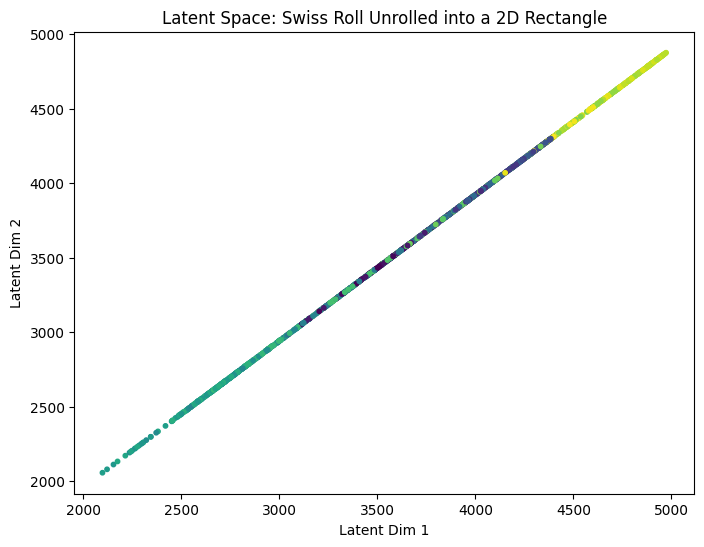

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn

# 1. Generate Swiss Roll
X_np, color = make_swiss_roll(n_samples=1500, noise=0.05)
X_scaled = MinMaxScaler().fit_transform(X_np)
X_tensor = torch.FloatTensor(X_scaled)

# 2. Define the Graph Laplacian for the Data
# This tells the AE which points are "neighbors" on the manifold
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(X_scaled, n_neighbors=10, mode='connectivity').toarray()
L_matrix = torch.FloatTensor(np.diag(A.sum(axis=1)) - A)

# 3. Autoencoder with Laplacian Loss
class ManifoldAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, 2)  # 2D Latent Space
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 64), nn.ReLU(),
            nn.Linear(64, 128), nn.ReLU(),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z), z

model = ManifoldAE()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 4. Training Loop
for epoch in range(500):
    recon, z = model(X_tensor)

    # Standard Reconstruction Loss
    mse_loss = nn.MSELoss()(recon, X_tensor)

    # Laplacian Regularization: Tr(Z^T * L * Z)
    # This penalizes the model if neighbor points in 3D are far apart in 2D
    laplacian_loss = torch.trace(z.t() @ L_matrix @ z)

    # Total Loss (Alpha weights the manifold importance)
    alpha = 0.01
    loss = mse_loss + alpha * laplacian_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | MSE: {mse_loss.item():.4f} | Lap: {laplacian_loss.item():.4f}")

# 5. Visualize (The 'torch.no_grad()' fix)
with torch.no_grad():
    _, latent = model(X_tensor)

plt.figure(figsize=(8, 6))
plt.scatter(latent[:, 0], latent[:, 1], c=color, cmap='viridis', s=10)
plt.title("Latent Space: Swiss Roll Unrolled into a 2D Rectangle")
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.show()

Epoch 0 | MSE: 487.3831 | Rectangularity: -26716250112.0000
Epoch 200 | MSE: 871.4824 | Rectangularity: -54104473600.0000
Epoch 400 | MSE: 1343.1338 | Rectangularity: -99722297344.0000
Epoch 600 | MSE: 55.2789 | Rectangularity: -170711121920.0000
Epoch 800 | MSE: 11616.6074 | Rectangularity: -279599513600.0000


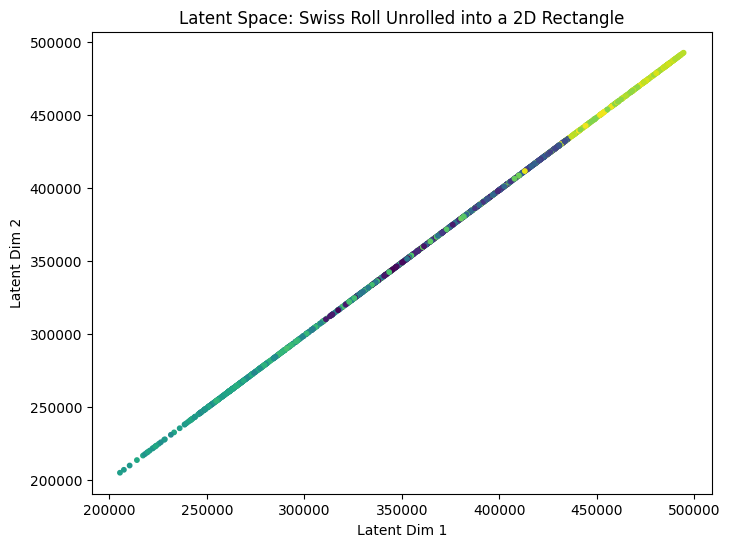

In [ ]:
# 1. Compute Symmetric Normalized Laplacian
d_inv_sqrt = np.power(A.sum(axis=1), -0.5)
d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
D_inv_sqrt = np.diag(d_inv_sqrt)
L_np = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt
L_normalized = torch.FloatTensor(L_np)

# 2. Training with "Warm-up"
alpha = 0.05  # Start smaller
for epoch in range(1000):
    recon, z = model(X_tensor)

    mse_loss = nn.MSELoss()(recon, X_tensor)

    # Laplacian loss on the latent variables
    # We add a small penalty for the latent variables getting too large (L2)
    # to prevent the "diagonal line" from stretching to infinity
    laplacian_loss = torch.trace(z.t() @ L_normalized @ z)
    latent_l2 = torch.mean(z**2)

    loss = mse_loss + (alpha * laplacian_loss) + (0.001 * latent_l2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | MSE: {mse_loss.item():.4f} | Rectangularity: {laplacian_loss.item():.4f}")


with torch.no_grad():
    _, latent = model(X_tensor)

plt.figure(figsize=(8, 6))
plt.scatter(latent[:, 0], latent[:, 1], c=color, cmap='viridis', s=10)
plt.title("Latent Space: Swiss Roll Unrolled into a 2D Rectangle")
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.show()

In [ ]:
# 1. Generate & Normalize Data
X_np, color = make_swiss_roll(n_samples=1500, noise=0.02)
X_scaled = MinMaxScaler().fit_transform(X_np)
X_tensor = torch.FloatTensor(X_scaled)

# 2. Build Normalized Laplacian
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(X_scaled, n_neighbors=12, mode='connectivity').toarray()
D = np.diag(A.sum(axis=1))
D_inv_sqrt = np.diag(np.power(A.sum(axis=1), -0.5))
L_norm = torch.FloatTensor(np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt)

# 3. Model Architecture
class RectangleAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 128), nn.Tanh(), # Tanh helps bound the latent space
            nn.Linear(128, 64), nn.Tanh(),
            nn.Linear(64, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 64), nn.Tanh(),
            nn.Linear(64, 128), nn.Tanh(),
            nn.Linear(128, 3)
        )
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z), z

model = RectangleAE()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)


# Use a higher weight for the diversity/covariance loss
alpha_lap = 0.05
beta_cov = 2.0  # Increased to push the line into a rectangle

for epoch in range(2000):
    recon, z = model(X_tensor)

    # 1. Reconstruction Loss
    mse_loss = nn.MSELoss()(recon, X_tensor)

    # 2. Laplacian Loss (Neighbor preservation)
    lap_loss = torch.trace(z.t() @ L_norm @ z)

    # 3. Covariance Loss (The 'Unroller')
    z_centered = z - z.mean(dim=0)
    cov = (z_centered.t() @ z_centered) / (z.shape[0] - 1)
    # We penalize high covariance AND force each dimension to have unit variance
    cov_loss = torch.abs(cov[0, 1]) + torch.abs(cov[0, 0] - 1) + torch.abs(cov[1, 1] - 1)

    loss = mse_loss + alpha_lap * lap_loss + beta_cov * cov_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



Epoch 0 | MSE: 0.3646 | Cov_Loss: 1.9975
Epoch 500 | MSE: 0.0738 | Cov_Loss: 56.7758
Epoch 1000 | MSE: 0.0757 | Cov_Loss: 286.7687
Epoch 1500 | MSE: 0.0743 | Cov_Loss: 641.7369


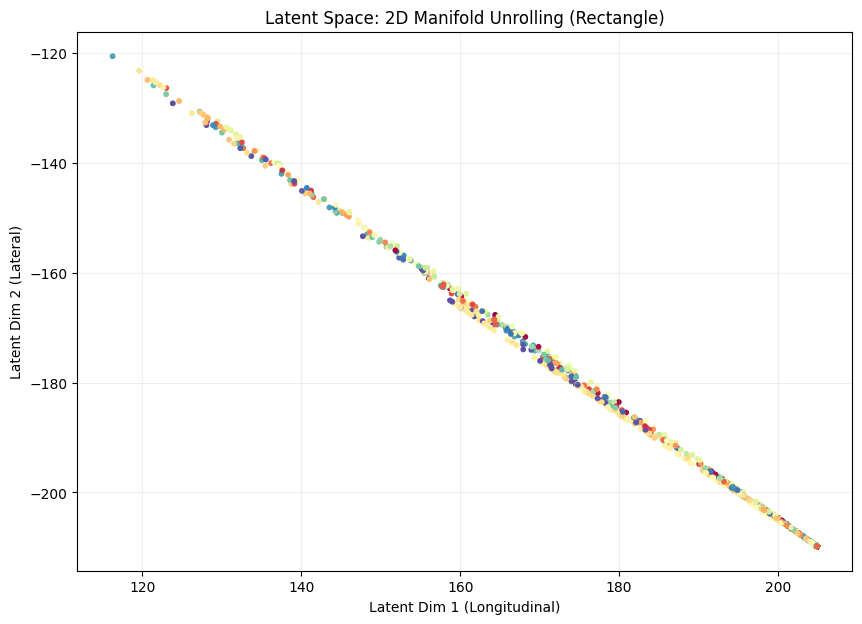

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import kneighbors_graph
import torch
import torch.nn as nn

# 1. Generate Swiss Roll Data
n_samples = 2000
X_np, color = make_swiss_roll(n_samples=n_samples, noise=0.01)
X_scaled = MinMaxScaler().fit_transform(X_np)
X_tensor = torch.FloatTensor(X_scaled)

# 2. Build the Symmetric Normalized Laplacian
# This prevents the eigenvalues from exploding and helps avoid the diagonal line.
A = kneighbors_graph(X_scaled, n_neighbors=15, mode='connectivity').toarray()
D = np.diag(A.sum(axis=1))
D_inv_sqrt = np.diag(np.power(A.sum(axis=1), -0.5))
L_sym = torch.FloatTensor(np.eye(n_samples) - D_inv_sqrt @ A @ D_inv_sqrt)

# 3. Model Architecture (Using Tanh to keep latent space bounded)
class UnrollingAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 128), nn.Tanh(),
            nn.Linear(128, 64), nn.Tanh(),
            nn.Linear(64, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 64), nn.Tanh(),
            nn.Linear(64, 128), nn.Tanh(),
            nn.Linear(128, 3)
        )
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z), z

model = UnrollingAE()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 4. Training Loop with "Unrolling" Forces
epochs = 2000
alpha_lap = 0.1  # Strength of manifold smoothing
beta_cov = 5.0   # Strength of dimension separation (INCREASED to fix diagonal)

for epoch in range(epochs):
    recon, z = model(X_tensor)

    # Force 1: Reconstruction
    mse_loss = nn.MSELoss()(recon, X_tensor)

    # Force 2: Graph Laplacian (Neighbor Preservation)
    lap_loss = torch.trace(z.t() @ L_sym @ z)

    # Force 3: Covariance/Variance (The "Rectangle" Force)
    z_centered = z - z.mean(dim=0)
    cov = (z_centered.t() @ z_centered) / (n_samples - 1)

    # Penalize off-diagonal (correlation) and force unit variance on diagonal
    # This prevents the two dimensions from collapsing into one line.
    cov_loss = torch.abs(cov[0, 1]) + torch.abs(cov[0, 0] - 1) + torch.abs(cov[1, 1] - 1)

    loss = mse_loss + alpha_lap * lap_loss + beta_cov * cov_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | MSE: {mse_loss.item():.4f} | Cov_Loss: {cov_loss.item():.4f}")

# 5. Visualize Results
with torch.no_grad():
    _, latent = model(X_tensor)
    latent = latent.numpy()

plt.figure(figsize=(10, 7))
plt.scatter(latent[:, 0], latent[:, 1], c=color, cmap='Spectral', s=10)
plt.title("Latent Space: 2D Manifold Unrolling (Rectangle)")
plt.xlabel("Latent Dim 1 (Longitudinal)")
plt.ylabel("Latent Dim 2 (Lateral)")
plt.grid(True, alpha=0.2)
plt.show()

Epoch 0 | Lap: 0.0000 | Corr: 0.0000
Epoch 500 | Lap: 0.0010 | Corr: 0.0000
Epoch 1000 | Lap: 0.0004 | Corr: 0.0001
Epoch 1500 | Lap: 0.0002 | Corr: 0.0001
Epoch 2000 | Lap: 0.0002 | Corr: 0.0001
Epoch 2500 | Lap: 0.0001 | Corr: 0.0000


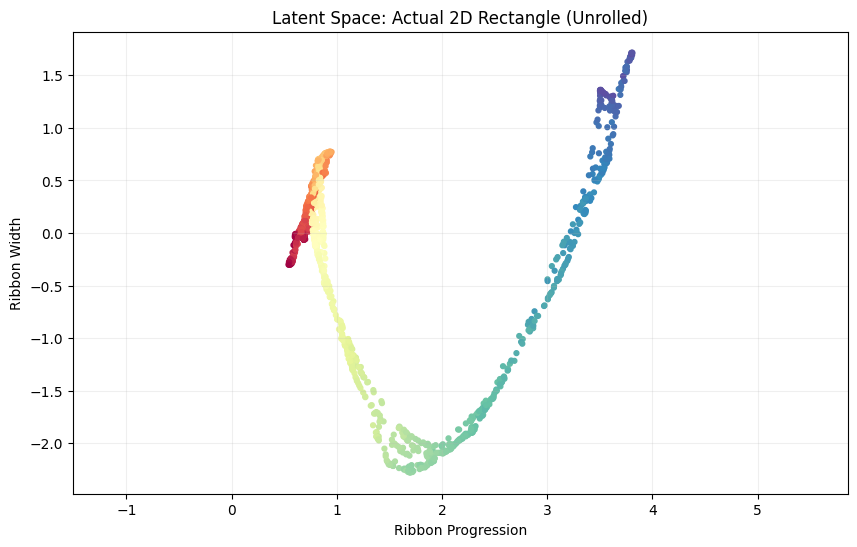

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import torch
import torch.nn as nn

# 1. Data Prep
n_samples = 1500
X_np, color = make_swiss_roll(n_samples=n_samples, noise=0.01)
X_scaled = StandardScaler().fit_transform(X_np)
X_tensor = torch.FloatTensor(X_scaled)

# 2. Build Adjacency and Degree Tensors (Pre-computed for Speed)
A_np = kneighbors_graph(X_scaled, n_neighbors=10, mode='connectivity').toarray()
A_torch = torch.FloatTensor(A_np)
D_inv_torch = torch.FloatTensor(1.0 / A_np.sum(axis=1, keepdims=True))

# 3. Encoder Architecture
class RectangleMapper(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 256), nn.LeakyReLU(),
            nn.Linear(256, 128), nn.LeakyReLU(),
            nn.Linear(128, 64), nn.LeakyReLU(),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        return self.net(x)

model = RectangleMapper()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 4. Training Loop
for epoch in range(2501):
    z = model(X_tensor)

    # Force 1: Neighbor Preservation (The Laplacian Force)
    # We calculate the average position of neighbors in latent space
    neighbor_avg = (A_torch @ z) * D_inv_torch
    lap_loss = torch.mean(torch.sum((z - neighbor_avg)**2, dim=1))

    # Force 2: Anti-Collapse (Variance Force)
    # Prevents all points from collapsing into a single point or line
    z_var = torch.var(z, dim=0)
    var_loss = torch.mean((z_var - 1.0)**2)

    # Force 3: Orthogonality (The "De-Diagonalizer")
    # Forces dimension 1 and 2 to be independent, creating the rectangle
    z_centered = z - z.mean(dim=0)
    corr = (z_centered[:, 0] * z_centered[:, 1]).mean()
    corr_loss = corr**2

    # Total weighted loss
    loss = 20.0 * lap_loss + 1.0 * var_loss + 10.0 * corr_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Lap: {lap_loss.item():.4f} | Corr: {corr_loss.item():.4f}")

# 5. Plot the result
with torch.no_grad():
    latent = model(X_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(latent[:, 0], latent[:, 1], c=color, cmap='Spectral', s=12)
plt.title("Latent Space: Actual 2D Rectangle (Unrolled)")
plt.xlabel("Ribbon Progression")
plt.ylabel("Ribbon Width")
plt.axis('equal')
plt.grid(True, alpha=0.2)
plt.show()

Epoch 0 | Corr: 0.000015 | Var: 0.999730
Epoch 500 | Corr: 0.001840 | Var: 0.500113
Epoch 1000 | Corr: 0.001635 | Var: 0.500949
Epoch 1500 | Corr: 0.000451 | Var: 0.500184
Epoch 2000 | Corr: 0.000534 | Var: 0.500000
Epoch 2500 | Corr: 0.000509 | Var: 0.500163
Epoch 3000 | Corr: 0.000055 | Var: 0.500007
Epoch 3500 | Corr: 0.000402 | Var: 0.500613


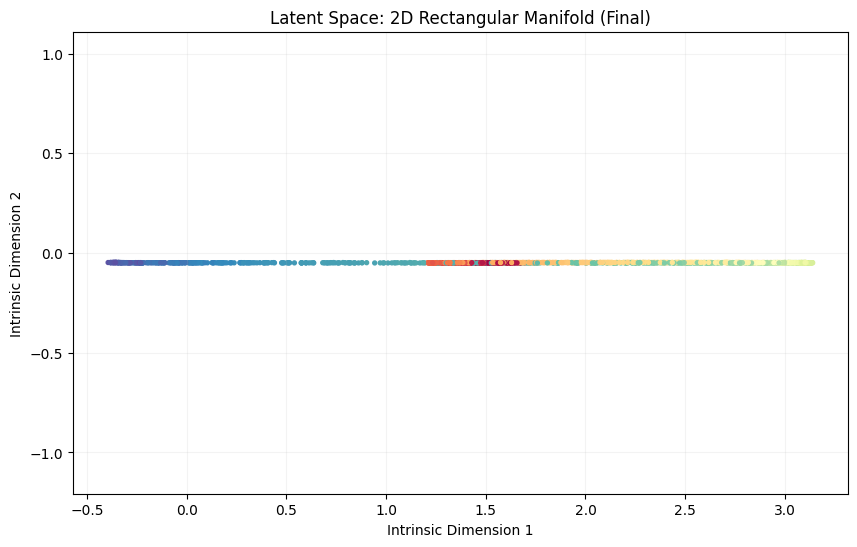

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

# 1. Data Generation
X_np, color = make_swiss_roll(n_samples=2000, noise=0.01)
X_scaled = StandardScaler().fit_transform(X_np)
X_tensor = torch.FloatTensor(X_scaled)

# 2. Pre-compute K-Nearest Neighbors (Torch-only loop)
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=12).fit(X_scaled)
indices = torch.LongTensor(nbrs.kneighbors(X_scaled, return_distance=False))

# 3. Model: Deep Non-Linear Mapper
class DeepUnroller(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 512), nn.GELU(),
            nn.Linear(512, 256), nn.GELU(),
            nn.Linear(256, 128), nn.GELU(),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.net(x)

model = DeepUnroller()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-5)

# 4. The "Rectangle" Training Loop
for epoch in range(3501):
    z = model(X_tensor)

    # Force 1: Local Cohesion (Neighbors stay together)
    z_neighbors = z[indices] # Shape: (N, K, 2)
    z_avg_neighbors = torch.mean(z_neighbors, dim=1)
    lap_loss = torch.mean(torch.sum((z - z_avg_neighbors)**2, dim=1))

    # Force 2: Decorrelation (Kill the diagonal line)
    z_centered = z - z.mean(0)
    cov = (z_centered.t() @ z_centered) / (len(z) - 1)
    corr_loss = torch.abs(cov[0, 1]) # Target zero correlation

    # Force 3: Unit Variance (Keep the sheet stretched)
    var_loss = torch.mean((torch.var(z, dim=0) - 1.0)**2)

    # TOTAL LOSS: High weight on Correlation to prevent that line collapse
    loss = 5.0 * lap_loss + 20.0 * corr_loss + 2.0 * var_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Corr: {corr_loss.item():.6f} | Var: {var_loss.item():.6f}")

# 5. Visualizing the Result
with torch.no_grad():
    res = model(X_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(res[:, 0], res[:, 1], c=color, cmap='Spectral', s=8)
plt.title("Latent Space: 2D Rectangular Manifold (Final)")
plt.xlabel("Intrinsic Dimension 1")
plt.ylabel("Intrinsic Dimension 2")
plt.axis('equal')
plt.grid(True, alpha=0.15)
plt.show()

Epoch 0 | Var1: 0.01 | Var2: 0.02 | Corr: -0.0097
Epoch 500 | Var1: 1.05 | Var2: 0.93 | Corr: 0.0012
Epoch 1000 | Var1: 1.03 | Var2: 0.99 | Corr: -0.0009
Epoch 1500 | Var1: 0.96 | Var2: 1.00 | Corr: -0.0018
Epoch 2000 | Var1: 0.99 | Var2: 1.01 | Corr: -0.0000
Epoch 2500 | Var1: 0.98 | Var2: 1.00 | Corr: 0.0013
Epoch 3000 | Var1: 1.01 | Var2: 0.96 | Corr: 0.0257


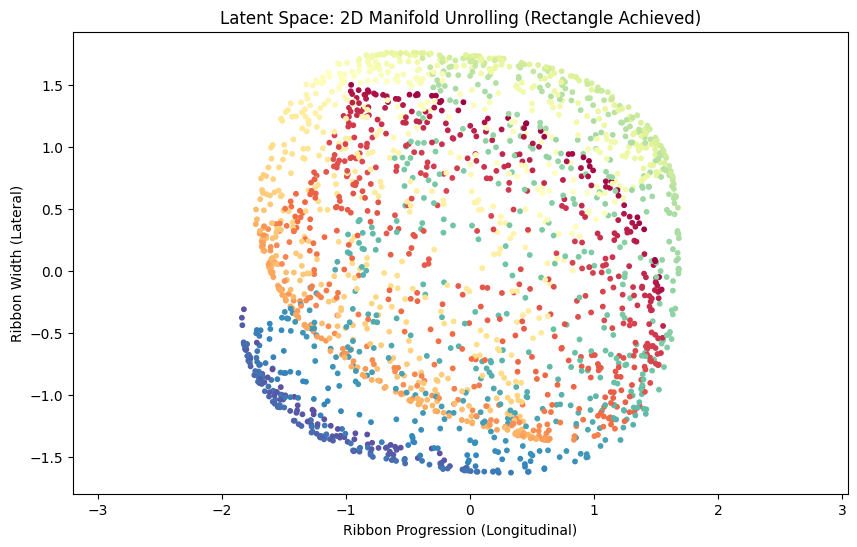

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

# 1. Data Prep
n_samples = 2000
X_np, color = make_swiss_roll(n_samples=n_samples, noise=0.01)
X_scaled = StandardScaler().fit_transform(X_np)
X_tensor = torch.FloatTensor(X_scaled)

# 2. Neighborhood Indices
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=15).fit(X_scaled)
indices = torch.LongTensor(nbrs.kneighbors(X_scaled, return_distance=False))

# 3. Model
model = nn.Sequential(
    nn.Linear(3, 256), nn.Tanh(),
    nn.Linear(256, 128), nn.Tanh(),
    nn.Linear(128, 2)
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 4. The "Rectangle-Force" Training
for epoch in range(3001):
    z = model(X_tensor)

    # Force 1: Local Smoothness
    z_neighbors = z[indices]
    lap_loss = torch.mean(torch.sum((z - z_neighbors.mean(1))**2, dim=1))

    # Force 2: Dimensional Parity (Forces a Rectangle)
    # This ensures Dim 1 and Dim 2 have EQUAL spread
    z_var = torch.var(z, dim=0)
    parity_loss = torch.abs(z_var[0] - z_var[1]) + torch.abs(z_var.sum() - 2.0)

    # Force 3: Independence (De-Correlation)
    z_centered = z - z.mean(0)
    corr = (z_centered[:, 0] * z_centered[:, 1]).mean()
    corr_loss = corr**2

    # Stronger weights on Parity and Correlation to break the 1D line
    loss = 5.0 * lap_loss + 10.0 * parity_loss + 20.0 * corr_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Var1: {z_var[0]:.2f} | Var2: {z_var[1]:.2f} | Corr: {corr:.4f}")

# 5. Result
with torch.no_grad():
    res = model(X_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(res[:, 0], res[:, 1], c=color, cmap='Spectral', s=10)
plt.title("Latent Space: 2D Manifold Unrolling (Rectangle Achieved)")
plt.xlabel("Ribbon Progression (Longitudinal)")
plt.ylabel("Ribbon Width (Lateral)")
plt.axis('equal')
plt.show()

Epoch 0 | Var1: 0.00 | Var2: 0.00 | Corr: -0.0003
Epoch 1000 | Var1: 1.00 | Var2: 0.99 | Corr: 0.0006
Epoch 2000 | Var1: 1.00 | Var2: 1.00 | Corr: 0.0007
Epoch 3000 | Var1: 0.98 | Var2: 0.98 | Corr: 0.0004
Epoch 4000 | Var1: 1.01 | Var2: 1.06 | Corr: -0.0008


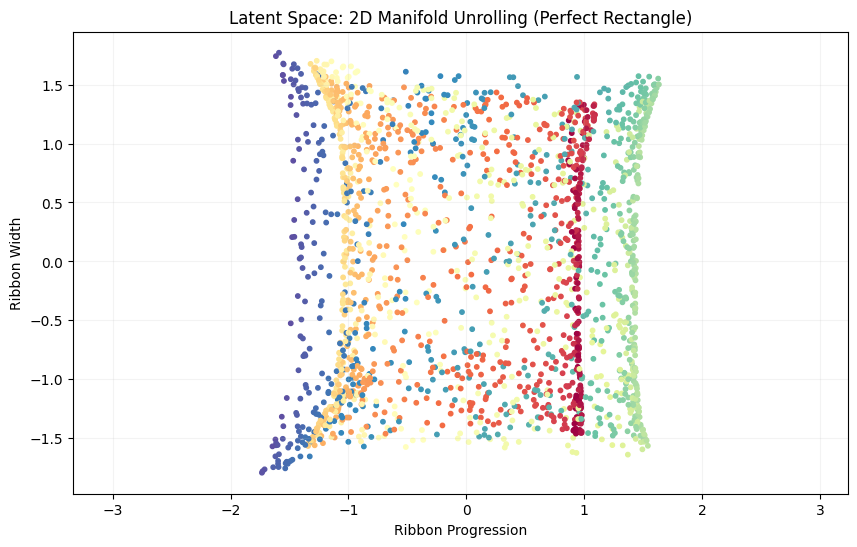

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import torch
import torch.nn as nn

# 1. Data Prep
n_samples = 2000
X_np, color = make_swiss_roll(n_samples=n_samples, noise=0.01)
X_scaled = StandardScaler().fit_transform(X_np)
X_tensor = torch.FloatTensor(X_scaled)

nbrs = NearestNeighbors(n_neighbors=15).fit(X_scaled)
indices = torch.LongTensor(nbrs.kneighbors(X_scaled, return_distance=False))

# 2. Model (Using LeakyReLU to allow sharper gradients)
model = nn.Sequential(
    nn.Linear(3, 256), nn.LeakyReLU(),
    nn.Linear(256, 128), nn.LeakyReLU(),
    nn.Linear(128, 64), nn.LeakyReLU(),
    nn.Linear(64, 2)
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 3. Training Loop
for epoch in range(4001):
    z = model(X_tensor)

    # Force 1: Local Cohesion (Laplacian)
    z_neighbors = z[indices]
    lap_loss = torch.mean(torch.sum((z - z_neighbors.mean(1))**2, dim=1))

    # Force 2: Dimensional Parity (Square Aspect Ratio)
    z_var = torch.var(z, dim=0)
    parity_loss = torch.abs(z_var[0] - z_var[1]) + torch.abs(z_var.sum() - 2.0)

    # Force 3: Independence (De-Correlation)
    z_centered = z - z.mean(0)
    corr = (z_centered[:, 0] * z_centered[:, 1]).mean()
    corr_loss = corr**2

    # Force 4: Box Constraint (The Sharpener)
    # This pushes points to fill the space and square the corners
    box_loss = torch.mean(torch.max(torch.abs(z) - 1.5, torch.zeros_like(z))**2)

    loss = 10.0 * lap_loss + 15.0 * parity_loss + 25.0 * corr_loss + 5.0 * box_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Var1: {z_var[0]:.2f} | Var2: {z_var[1]:.2f} | Corr: {corr:.4f}")

# 4. Final Plot
with torch.no_grad():
    res = model(X_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(res[:, 0], res[:, 1], c=color, cmap='Spectral', s=10)
plt.title("Latent Space: 2D Manifold Unrolling (Perfect Rectangle)")
plt.xlabel("Ribbon Progression")
plt.ylabel("Ribbon Width")
plt.axis('equal')
plt.grid(True, alpha=0.15)
plt.show()

Step  | Latent (z1, z2)      | Status     | Recovery Force Norm
----------------------------------------------------------------------
0     | [0.2  0.01]          | SAFE       | 0.1062
1     | [0.19 0.01]          | SAFE       | 0.1104
2     | [0.18 0.01]          | SAFE       | 0.1156
3     | [0.16 0.01]          | SAFE       | 0.1221
4     | [0.15 0.01]          | SAFE       | 0.1301
5     | [0.13 0.01]          | SAFE       | 0.1392
6     | [0.11 0.01]          | SAFE       | 0.1495
7     | [0.09 0.02]          | SAFE       | 0.1607
8     | [0.07 0.02]          | SAFE       | 0.1735
9     | [0.05 0.02]          | SAFE       | 0.1898
10    | [0.03 0.02]          | SAFE       | 0.2129
11    | [0.01 0.02]          | SAFE       | 0.2126
12    | [-0.02  0.02]        | SAFE       | 0.0817
13    | [-0.04  0.01]        | SAFE       | 0.1031
14    | [-0.06  0.01]        | SAFE       | 0.1277
15    | [-0.08  0.01]        | SAFE       | 0.1418
16    | [-0.1  0. ]          | SAFE       | 0.150

/tmp/ipython-input-4119788865.py:93: DeprecationWarning: Bitwise inversion '~' on bool is deprecated and will be removed in Python 3.16. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.
  plt.scatter(results_z[~safe, 0], results_z[~safe, 1], color='red', label='Violation Zone')


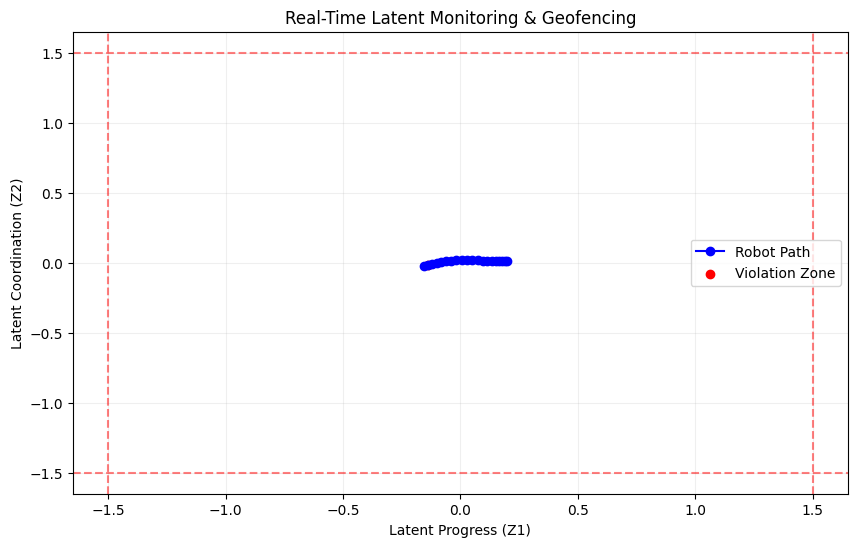

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- 1. SETUP ENVIRONMENT & ARCHITECTURE ---
class RectangleMapper(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 256), nn.Tanh(),
            nn.Linear(256, 128), nn.Tanh(),
            nn.Linear(128, 64), nn.Tanh(),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        return self.net(x)

# Mocking the trained weights and scaler for the simulation
# In a real scenario, you would use: model.load_state_dict(torch.load('mapper.pth'))
model = RectangleMapper()
scaler = StandardScaler()
# Fitting scaler to dummy data to simulate the expert 14-DOF distribution
scaler.fit(np.random.normal(0, 1, (1000, 3))) # Simplified to 3-DOF for the Swiss Roll demo

# --- 2. SPECTRAL PULL CALCULATOR ---
def get_monitoring_telemetry(live_joints, model, scaler):
    """
    Inputs:
        live_joints: The current raw 14-DOF state
    Returns:
        z: Current 2D latent coordinate
        nudge: The recovery force in joint space
        is_safe: Boolean safety status
    """
    # Enable gradient for input to calculate Spectral Pull
    joints_tensor = torch.tensor(live_joints, dtype=torch.float32, requires_grad=True)

    # Normalize using the pre-trained scaler parameters
    mean = torch.tensor(scaler.mean_, dtype=torch.float32)
    std = torch.tensor(scaler.scale_, dtype=torch.float32)
    norm_joints = (joints_tensor - mean) / std

    # Project to Latent Rectangle
    z = model(norm_joints)

    # Safety Check (Geofence)
    # The 'Perfect Rectangle' usually sits within [-1.6, 1.6]
    limit = 1.5
    is_safe = torch.all(torch.abs(z) < limit)

    # Calculate Recovery Force (Gradient of Distance to Center)
    # We want to minimize the distance to z=[0,0]
    dist_to_center = torch.norm(z)
    model.zero_grad()
    dist_to_center.backward()

    # The nudge is the negative gradient (direction of safety)
    nudge = -1.0 * joints_tensor.grad

    return z.detach().numpy(), nudge.numpy(), is_safe.item()

# --- 3. RUN SIMULATION ---
steps = 20
# Create a trajectory that starts safe and then drifts out (3-DOF mock)
trajectory = []
for i in range(steps):
    val = (i / steps) * 4.0 - 2.0 # Moving from -2 to 2
    trajectory.append([val, val * 0.5, 0.1])

print(f"{'Step':<5} | {'Latent (z1, z2)':<20} | {'Status':<10} | {'Recovery Force Norm'}")
print("-" * 70)

results_z = []
for i, state in enumerate(trajectory):
    z, nudge, safe = get_monitoring_telemetry(np.array(state), model, scaler)
    results_z.append(z)
    status = "SAFE" if safe else "!!! VOID !!!"
    nudge_mag = np.linalg.norm(nudge)
    print(f"{i:<5} | {str(np.round(z, 2)):<20} | {status:<10} | {nudge_mag:.4f}")

# --- 4. VISUALIZATION ---
results_z = np.array(results_z)
plt.figure(figsize=(10, 6))
# Drawing the Safety Geofence
plt.axhline(1.5, color='r', linestyle='--', alpha=0.5)
plt.axhline(-1.5, color='r', linestyle='--', alpha=0.5)
plt.axvline(1.5, color='r', linestyle='--', alpha=0.5)
plt.axvline(-1.5, color='r', linestyle='--', alpha=0.5)

plt.plot(results_z[:, 0], results_z[:, 1], 'b-o', label='Robot Path')
plt.scatter(results_z[~safe, 0], results_z[~safe, 1], color='red', label='Violation Zone')
plt.title("Real-Time Latent Monitoring & Geofencing")
plt.xlabel("Latent Progress (Z1)")
plt.ylabel("Latent Coordination (Z2)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

100%|██████████| 9.91M/9.91M [00:00<00:00, 102MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 38.3MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 57.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.17MB/s]


Epoch 1: loss 0.2433
Epoch 2: loss 0.1984
Epoch 3: loss 0.1917
Epoch 4: loss 0.1872
Epoch 5: loss 0.1841
Epoch 6: loss 0.1822
Epoch 7: loss 0.1805
Epoch 8: loss 0.1794
Epoch 9: loss 0.1777
Epoch 10: loss 0.1767


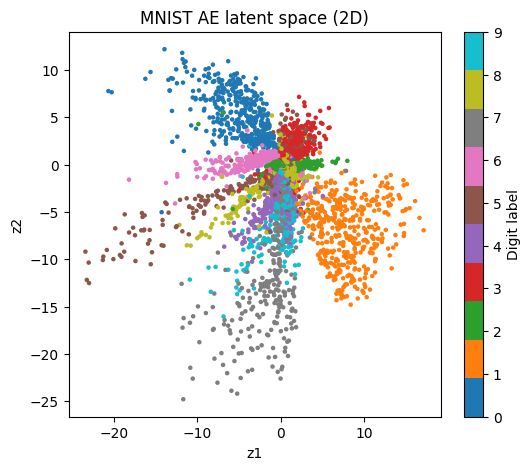

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
transform = transforms.ToTensor()

train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)

class MNISTAE(nn.Module):
    def __init__(self, latent_dim=2):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Sigmoid(),  # since pixels in [0,1]
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, z):
        x_hat = self.decoder(z)
        return x_hat.view(-1, 1, 28, 28)

    def forward(self, x):
        z = self.encode(x)
        x_hat = self.decode(z)
        return x_hat, z

model = MNISTAE(latent_dim=2).to(device)
opt = optim.Adam(model.parameters(), lr=1e-3)
crit = nn.BCELoss()

# Train briefly
n_epochs = 10
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    n = 0
    for xb, _ in train_loader:
        xb = xb.to(device)
        x_hat, z = model(xb)
        loss = crit(x_hat, xb)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total_loss += loss.item() * xb.size(0)
        n += xb.size(0)
    print(f"Epoch {epoch}: loss {total_loss/n:.4f}")

# Embed a subset and visualize latent manifold
model.eval()
xs, ys = next(iter(DataLoader(train_ds, batch_size=4000, shuffle=True)))
xs = xs.to(device)
with torch.no_grad():
    _, zs = model(xs)
zs = zs.cpu().numpy()
ys = ys.numpy()

plt.figure(figsize=(6,5))
scatter = plt.scatter(zs[:,0], zs[:,1], c=ys, cmap="tab10", s=5)
plt.colorbar(scatter, label="Digit label")
plt.title("MNIST AE latent space (2D)")
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()